In [1]:
from package import *

# Compiler Experiments

## Haar Random Unitaries

In [22]:
# consider the compilation of n-qubit Haar random unitaries
max_n = 6

for n in range(2, max_n):
    dim = 2**n
    U = unitary_group.rvs(dim) # generate the random unitary as a 2D numpy array
    qc = gen_qsd(U).decompose() # compile x into a circuit, the gen_qsd(Unitary) function
    print("Number of Qubits", n,  "Number of Gates", qc.count_ops())

Number of Qubits 2 Number of Gates OrderedDict([('u', 23), ('cx', 3)])
Number of Qubits 3 Number of Gates OrderedDict([('u', 92), ('cx', 24), ('u3', 12)])
Number of Qubits 4 Number of Gates OrderedDict([('u', 368), ('cx', 120), ('u3', 72)])
Number of Qubits 5 Number of Gates OrderedDict([('u', 1472), ('cx', 528), ('u3', 336)])


## Time Evolution Circuit Gate Counts

In [2]:
max_order = 6
min_steps = 4
max_steps = 20

In [3]:
c, unc = gate_count_experiment(max_order, min_steps, max_steps, time = np.pi, backend = sim)

Starting kth order formulas, 2k =  1
at number os steps  4 compiled, uncompiled  23 24
at number os steps  5 compiled, uncompiled  33 30
at number os steps  6 compiled, uncompiled  33 36
at number os steps  7 compiled, uncompiled  33 42
at number os steps  8 compiled, uncompiled  33 48
at number os steps  9 compiled, uncompiled  33 54
at number os steps  10 compiled, uncompiled  33 60
at number os steps  11 compiled, uncompiled  33 66
at number os steps  12 compiled, uncompiled  33 72
at number os steps  13 compiled, uncompiled  33 78
at number os steps  14 compiled, uncompiled  33 84
at number os steps  15 compiled, uncompiled  33 90
at number os steps  16 compiled, uncompiled  33 96
at number os steps  17 compiled, uncompiled  33 102
at number os steps  18 compiled, uncompiled  33 108
at number os steps  19 compiled, uncompiled  33 114
at number os steps  20 compiled, uncompiled  33 120
Starting kth order formulas, 2k =  2
at number os steps  4 compiled, uncompiled  33 27
at number o

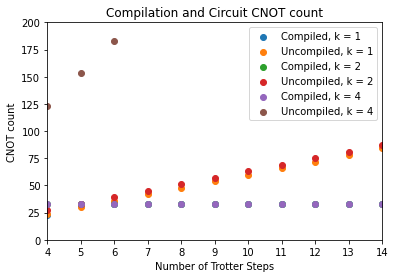

In [19]:
for i in range(max_order//2):
    if i == 0:
        order = 1
    if i > 0:
        order = 2*i
        
    compiled_counts = c[i]
    uncompiled_counts = unc[i]
    
    labelc = "Compiled, k = " + str(order)
    labelunc = "Uncompiled, k = " + str(order)

    plt.scatter(range(min_steps, max_steps+1), compiled_counts , label = labelc)
    plt.scatter(range(min_steps, max_steps+1), uncompiled_counts , label = labelunc)
    
    
plt.xticks(range(4, 16, 1))
plt.xlim([4, 14])
plt.ylim([0, 200])

plt.xlabel("Number of Trotter Steps")
plt.ylabel("CNOT count")
plt.title("Compilation and Circuit CNOT count")
  
plt.legend()
plt.show()